In [ ]:
print("Hello pratham")

Hello pratham


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_1 = pd.read_csv("final_data.csv",encoding='iso-8859-1')
data_1.head()

,Date,Title,Close,High,Low,Open,Volume
0,02-07-2025 03:00,"Nifty , Sensex likely to open flat as rangebou...",25453.40039,25608.09961,25378.75,25588.30078,309800
1,02-07-2025 03:15,"NIFTY MIDCAP 150 Index Live , 02 July 2025 : W...",25453.40039,25608.09961,25378.75,25588.30078,309800
2,02-07-2025 03:15,"NIFTY BANK Index Live , 02 July 2025 : Review ...",25453.40039,25608.09961,25378.75,25588.30078,309800
3,02-07-2025 03:15,India equity benchmarks likely to rise after T...,25453.40039,25608.09961,25378.75,25588.30078,309800
4,02-07-2025 03:15,"NIFTY NEXT 50 Index Live , 02 July 2025 : Hist...",25453.40039,25608.09961,25378.75,25588.30078,309800


In [ ]:
data_1.columns

Index(['Date', 'Title', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3700 non-null   object 
 1   Title   3700 non-null   object 
 2   Close   3700 non-null   float64
 3   High    3700 non-null   float64
 4   Low     3700 non-null   float64
 5   Open    3700 non-null   float64
 6   Volume  3700 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 202.5+ KB


In [ ]:
data_1.describe()

,Close,High,Low,Open,Volume
count,3700.00000,3700.000000,3700.000000,3700.000000,3700.000000
mean,24832.04527,24937.059380,24760.888401,24863.988133,282693.864865
std,257.40776,241.659114,266.148409,270.045466,113279.147954
min,24363.30078,24572.449220,24337.500000,24371.500000,185400.000000
25%,24625.05078,24733.099610,24533.199220,24653.000000,224600.000000
50%,24773.15039,24919.650390,24751.550780,24891.349610,244100.000000
75%,24980.65039,25037.300780,24918.650390,24991.000000,314100.000000
max,25522.50000,25608.099610,25424.349610,25588.300780,750500.000000


In [ ]:
data_1.head()

,Date,Title,Close,High,Low,Open,Volume
0,02-07-2025 03:00,"Nifty , Sensex likely to open flat as rangebou...",25453.40039,25608.09961,25378.75,25588.30078,309800
1,02-07-2025 03:15,"NIFTY MIDCAP 150 Index Live , 02 July 2025 : W...",25453.40039,25608.09961,25378.75,25588.30078,309800
2,02-07-2025 03:15,"NIFTY BANK Index Live , 02 July 2025 : Review ...",25453.40039,25608.09961,25378.75,25588.30078,309800
3,02-07-2025 03:15,India equity benchmarks likely to rise after T...,25453.40039,25608.09961,25378.75,25588.30078,309800
4,02-07-2025 03:15,"NIFTY NEXT 50 Index Live , 02 July 2025 : Hist...",25453.40039,25608.09961,25378.75,25588.30078,309800


In [ ]:
!pip install transformers torch

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
import torch

In [ ]:
model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForSequenceClassification.from_pretrained(model_name)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
labels = ["positive", "negative", "neutral"]

def get_finbert_sentiment(text):

  inputs = tokenizer(text,return_tensors="pt",truncation=True,padding=True)

  with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    probs = torch.softmax(logits,dim=1).flatten().tolist()

  sentiment_dict = {labels[i] : probs[i] for i in range(len(labels))}
  sentiment_dict["prediction"] =  labels[torch.argmax(logits)]


  return sentiment_dict

In [ ]:
print(get_finbert_sentiment("Nifty 50 surges as banking stocks rally"))

{'positive': 0.6538307666778564, 'negative': 0.26362884044647217, 'neutral': 0.08254039287567139, 'prediction': 'positive'}


In [ ]:
sentiments = data_1["Title"].apply(get_finbert_sentiment)

In [ ]:
data_1["sent_pos"] = sentiments.apply(lambda x: x["positive"])
data_1["sent_neg"] = sentiments.apply(lambda x: x["negative"])
data_1["sent_neu"] = sentiments.apply(lambda x: x["neutral"])
data_1["sent_predicted"] = sentiments.apply(lambda x: x["prediction"])


In [ ]:
data_1.head()

,Date,Title,Close,High,Low,Open,Volume,sent_pos,sent_neg,sent_neu,sent_predicted
0,02-07-2025 03:00,"Nifty , Sensex likely to open flat as rangebou...",25453.40039,25608.09961,25378.75,25588.30078,309800,0.500209,0.385693,0.114098,positive
1,02-07-2025 03:15,"NIFTY MIDCAP 150 Index Live , 02 July 2025 : W...",25453.40039,25608.09961,25378.75,25588.30078,309800,0.030344,0.038585,0.931071,neutral
2,02-07-2025 03:15,"NIFTY BANK Index Live , 02 July 2025 : Review ...",25453.40039,25608.09961,25378.75,25588.30078,309800,0.026452,0.049234,0.924313,neutral
3,02-07-2025 03:15,India equity benchmarks likely to rise after T...,25453.40039,25608.09961,25378.75,25588.30078,309800,0.901253,0.037382,0.061365,positive
4,02-07-2025 03:15,"NIFTY NEXT 50 Index Live , 02 July 2025 : Hist...",25453.40039,25608.09961,25378.75,25588.30078,309800,0.045709,0.023249,0.931042,neutral


In [ ]:
data_1.to_csv("Data_with_sentiments.csv")

In [ ]:
data_1["Return"] = data_1["Close"].pct_change()

In [ ]:
data_1.head()

In [ ]:
data_1.to_csv("Data_with_sent_returns.csv")

## Aggregating and converting into a normal data.

In [ ]:
data_1["Date"] = pd.to_datetime(data_1["Date"],dayfirst=True).dt.date

In [ ]:
data_1["Date"]

,Date
0,2025-07-02
1,2025-07-02
2,2025-07-02
3,2025-07-02
4,2025-07-02
...,...
3695,2025-09-12
3696,2025-09-12
3697,2025-09-12
3698,2025-09-12


In [ ]:
daily_sentiment = data_1.groupby("Date").agg({
    "sent_pos" : "mean",
    "sent_neg" : "mean",
    "sent_neu" : "mean",
    "Close" : "last",
    "Volume" : "sum"
}).reset_index()

In [ ]:
daily_sentiment.head(10)

,Date,sent_pos,sent_neg,sent_neu,Close,Volume
0,2025-07-02,0.424767,0.187084,0.388150,25453.40039,7435200
1,2025-07-03,0.353953,0.219477,0.426570,25405.30078,7921800
2,2025-07-04,0.229565,0.410065,0.360370,25461.00000,7546500
3,2025-07-05,0.175169,0.356337,0.468493,25461.30078,1176600
4,2025-07-06,0.036588,0.217578,0.745834,25461.30078,980500
5,2025-07-07,0.197945,0.315498,0.486556,25461.30078,6079100
6,2025-07-08,0.312792,0.248385,0.438823,25522.50000,7784800
7,2025-07-09,0.351275,0.264394,0.384331,25476.09961,5499300
8,2025-07-10,0.163132,0.223649,0.613219,25355.25000,7246800
9,2025-07-11,0.205311,0.397449,0.397240,25149.84961,10250000


In [ ]:
daily_sentiment.describe()

,sent_pos,sent_neg,sent_neu,Close,Volume
count,73.000000,73.000000,73.000000,73.000000,7.300000e+01
mean,0.273646,0.248696,0.477658,24900.121388,1.432832e+07
std,0.106317,0.114663,0.115491,291.647009,1.593338e+07
min,0.036588,0.021950,0.230453,24363.300780,9.156000e+05
25%,0.185076,0.174578,0.398462,24680.900390,6.482500e+06
50%,0.268516,0.236427,0.453570,24870.099610,9.380800e+06
75%,0.343164,0.320165,0.535716,25082.300780,1.605100e+07
max,0.520323,0.638166,0.820781,25522.500000,1.095730e+08


## Renaming columns and stuff

In [ ]:
daily_sentiment.rename(columns={
    "sent_pos" : "avg_sent_pos",
    "sent_neg" : "avg_sent_neg",
    "sent_neu" : "avg_sent_neu",

},inplace=True)

In [ ]:
daily_sentiment

,Date,avg_sent_pos,avg_sent_neg,avg_sent_neu,Close,Volume
0,2025-07-02,0.424767,0.187084,0.388150,25453.40039,7435200
1,2025-07-03,0.353953,0.219477,0.426570,25405.30078,7921800
2,2025-07-04,0.229565,0.410065,0.360370,25461.00000,7546500
3,2025-07-05,0.175169,0.356337,0.468493,25461.30078,1176600
4,2025-07-06,0.036588,0.217578,0.745834,25461.30078,980500
...,...,...,...,...,...,...
68,2025-09-08,0.314793,0.127814,0.557392,24773.15039,23025600
69,2025-09-09,0.295950,0.191196,0.512854,24868.59961,29950800
70,2025-09-10,0.330650,0.157300,0.512051,24973.09961,32953500
71,2025-09-11,0.336988,0.196150,0.466862,25005.50000,41101800


In [ ]:
daily_sentiment["net_sentiment"] = daily_sentiment["avg_sent_pos"] - daily_sentiment["avg_sent_neg"]

In [ ]:
daily_sentiment

,Date,avg_sent_pos,avg_sent_neg,avg_sent_neu,Close,Volume,net_sentiment
0,2025-07-02,0.424767,0.187084,0.388150,25453.40039,7435200,0.237683
1,2025-07-03,0.353953,0.219477,0.426570,25405.30078,7921800,0.134476
2,2025-07-04,0.229565,0.410065,0.360370,25461.00000,7546500,-0.180500
3,2025-07-05,0.175169,0.356337,0.468493,25461.30078,1176600,-0.181168
4,2025-07-06,0.036588,0.217578,0.745834,25461.30078,980500,-0.180989
...,...,...,...,...,...,...,...
68,2025-09-08,0.314793,0.127814,0.557392,24773.15039,23025600,0.186979
69,2025-09-09,0.295950,0.191196,0.512854,24868.59961,29950800,0.104755
70,2025-09-10,0.330650,0.157300,0.512051,24973.09961,32953500,0.173350
71,2025-09-11,0.336988,0.196150,0.466862,25005.50000,41101800,0.140838


In [ ]:
daily_sentiment["Return"] = daily_sentiment["Close"].pct_change()


In [ ]:
daily_sentiment

,Date,avg_sent_pos,avg_sent_neg,avg_sent_neu,Close,Volume,net_sentiment,Return
0,2025-07-02,0.424767,0.187084,0.388150,25453.40039,7435200,0.237683,NaN
1,2025-07-03,0.353953,0.219477,0.426570,25405.30078,7921800,0.134476,-0.001890
2,2025-07-04,0.229565,0.410065,0.360370,25461.00000,7546500,-0.180500,0.002192
3,2025-07-05,0.175169,0.356337,0.468493,25461.30078,1176600,-0.181168,0.000012
4,2025-07-06,0.036588,0.217578,0.745834,25461.30078,980500,-0.180989,0.000000
...,...,...,...,...,...,...,...,...
68,2025-09-08,0.314793,0.127814,0.557392,24773.15039,23025600,0.186979,0.000000
69,2025-09-09,0.295950,0.191196,0.512854,24868.59961,29950800,0.104755,0.003853
70,2025-09-10,0.330650,0.157300,0.512051,24973.09961,32953500,0.173350,0.004202
71,2025-09-11,0.336988,0.196150,0.466862,25005.50000,41101800,0.140838,0.001297


In [ ]:
daily_sentiment["Target"] = (daily_sentiment["Return"].shift(-1) > 0).astype(int)

In [ ]:
daily_sentiment

,Date,avg_sent_pos,avg_sent_neg,avg_sent_neu,Close,Volume,net_sentiment,Return,Target
0,2025-07-02,0.424767,0.187084,0.388150,25453.40039,7435200,0.237683,NaN,0
1,2025-07-03,0.353953,0.219477,0.426570,25405.30078,7921800,0.134476,-0.001890,1
2,2025-07-04,0.229565,0.410065,0.360370,25461.00000,7546500,-0.180500,0.002192,1
3,2025-07-05,0.175169,0.356337,0.468493,25461.30078,1176600,-0.181168,0.000012,0
4,2025-07-06,0.036588,0.217578,0.745834,25461.30078,980500,-0.180989,0.000000,0
...,...,...,...,...,...,...,...,...,...
68,2025-09-08,0.314793,0.127814,0.557392,24773.15039,23025600,0.186979,0.000000,1
69,2025-09-09,0.295950,0.191196,0.512854,24868.59961,29950800,0.104755,0.003853,1
70,2025-09-10,0.330650,0.157300,0.512051,24973.09961,32953500,0.173350,0.004202,1
71,2025-09-11,0.336988,0.196150,0.466862,25005.50000,41101800,0.140838,0.001297,1


In [ ]:
daily_sentiment.to_csv("most_imp_data.csv")

In [ ]:
daily_sentiment["Return"] = daily_sentiment["Return"].fillna(0)

In [ ]:
daily_sentiment

,Date,avg_sent_pos,avg_sent_neg,avg_sent_neu,Close,Volume,net_sentiment,Return,Target
0,2025-07-02,0.424767,0.187084,0.388150,25453.40039,7435200,0.237683,0.000000,0
1,2025-07-03,0.353953,0.219477,0.426570,25405.30078,7921800,0.134476,-0.001890,1
2,2025-07-04,0.229565,0.410065,0.360370,25461.00000,7546500,-0.180500,0.002192,1
3,2025-07-05,0.175169,0.356337,0.468493,25461.30078,1176600,-0.181168,0.000012,0
4,2025-07-06,0.036588,0.217578,0.745834,25461.30078,980500,-0.180989,0.000000,0
...,...,...,...,...,...,...,...,...,...
68,2025-09-08,0.314793,0.127814,0.557392,24773.15039,23025600,0.186979,0.000000,1
69,2025-09-09,0.295950,0.191196,0.512854,24868.59961,29950800,0.104755,0.003853,1
70,2025-09-10,0.330650,0.157300,0.512051,24973.09961,32953500,0.173350,0.004202,1
71,2025-09-11,0.336988,0.196150,0.466862,25005.50000,41101800,0.140838,0.001297,1


### Drawing graphs to visualize the data

#### Sentiment Over Time

In [ ]:
import matplotlib.pyplot as plt


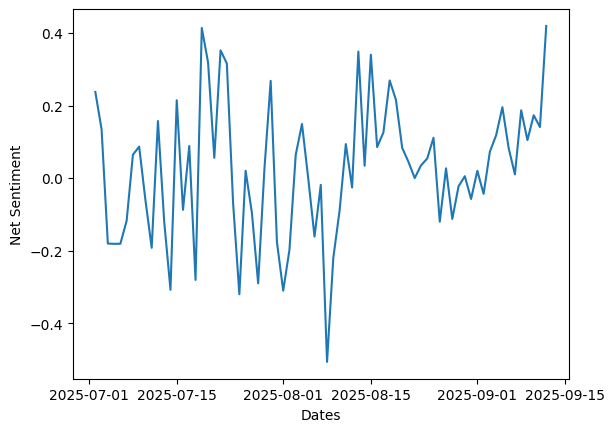

In [ ]:
plt.plot(daily_sentiment["Date"],daily_sentiment["net_sentiment"])
plt.xlabel("Dates")
plt.ylabel("Net Sentiment")
plt.show()

#### Sentiment vs. Market Returns

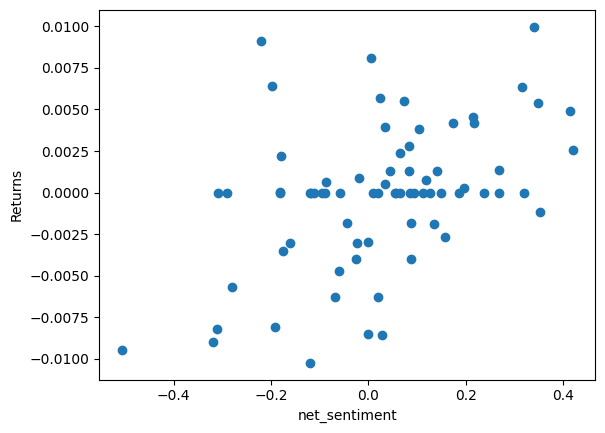

In [ ]:
plt.scatter(daily_sentiment["net_sentiment"],daily_sentiment["Return"])
plt.xlabel("net_sentiment")
plt.ylabel("Returns")
plt.show()

## Modeling the whole data

#### Starting with Logistic regression as baseline.

In [ ]:
X = daily_sentiment.iloc[:,1:-1].values
y = daily_sentiment.iloc[:,-1].values

In [ ]:
print(X)
print(y)

[[ 4.24766556e-01  1.87083836e-01  3.88149606e-01  2.54534004e+04
   7.43520000e+06  2.37682720e-01  0.00000000e+00]
 [ 3.53953213e-01  2.19477180e-01  4.26569618e-01  2.54053008e+04
   7.92180000e+06  1.34476033e-01 -1.88971254e-03]
 [ 2.29565100e-01  4.10065397e-01  3.60369524e-01  2.54610000e+04
   7.54650000e+06 -1.80500297e-01  2.19242514e-03]
 [ 1.75169106e-01  3.56337468e-01  4.68493422e-01  2.54613008e+04
   1.17660000e+06 -1.81168362e-01  1.18133616e-05]
 [ 3.65883589e-02  2.17577636e-01  7.45834032e-01  2.54613008e+04
   9.80500000e+05 -1.80989277e-01  0.00000000e+00]
 [ 1.97945408e-01  3.15498489e-01  4.86556095e-01  2.54613008e+04
   6.07910000e+06 -1.17553080e-01  0.00000000e+00]
 [ 3.12791665e-01  2.48385057e-01  4.38823271e-01  2.55225000e+04
   7.78480000e+06  6.44066076e-02  2.40361718e-03]
 [ 3.51274552e-01  2.64394412e-01  3.84331046e-01  2.54760996e+04
   5.49930000e+06  8.68801396e-02 -1.81801900e-03]
 [ 1.63131916e-01  2.23649456e-01  6.13218622e-01  2.53552500e+0

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [ ]:
model.fit(X_scaled,y)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_scaled)

In [ ]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0])

#### Metrics


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [ ]:
confusion_matrix(y,y_pred)

array([[36,  9],
       [13, 15]])

In [ ]:
accuracy_score(y,y_pred)

0.6986301369863014

In [ ]:
f1_score(y,y_pred)

0.5769230769230769

#### Tackling non-linearity with Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier();

In [ ]:
random_forest.fit(X_scaled,y)

In [ ]:
y_pred = random_forest.predict(X_scaled)

In [ ]:
confusion_matrix(y,y_pred)

In [ ]:
accuracy_score(y,y_pred)

In [ ]:
f1_score(y,y_pred)